In [48]:
import requests as rq
from bs4 import BeautifulStoneSoup as bs
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,CategoricalNB,MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\waterQuality1.csv")

In [3]:
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

* in ammonia column un-necessary values like "#NUM!" are there we need too replace with mean or median

* in ammonia column few rows are empty (with space) we need to replace that with some value(like mean of that columns)

In [5]:
data['ammonia'] = data['ammonia'].replace("#NUM!","")
data['ammonia'] = data['ammonia'].replace("'","")
data['ammonia'] = data['ammonia'].replace("","0.17")

* actually ammonia column is in floating values but dtype is object need to change this

In [6]:
data['ammonia'] = data['ammonia'].astype(float)

* successfully changed dtype

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [8]:
data.duplicated().sum()

0

* in this dataset there is no more duplicates

In [9]:
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

* in this dataset no null values are there

In [10]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272920,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.881467,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


* these are the dicriptive statistics about the data

In [11]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [12]:
fv = data.drop(['is_safe'],axis=1)
cv = data[['is_safe']]

<AxesSubplot:>

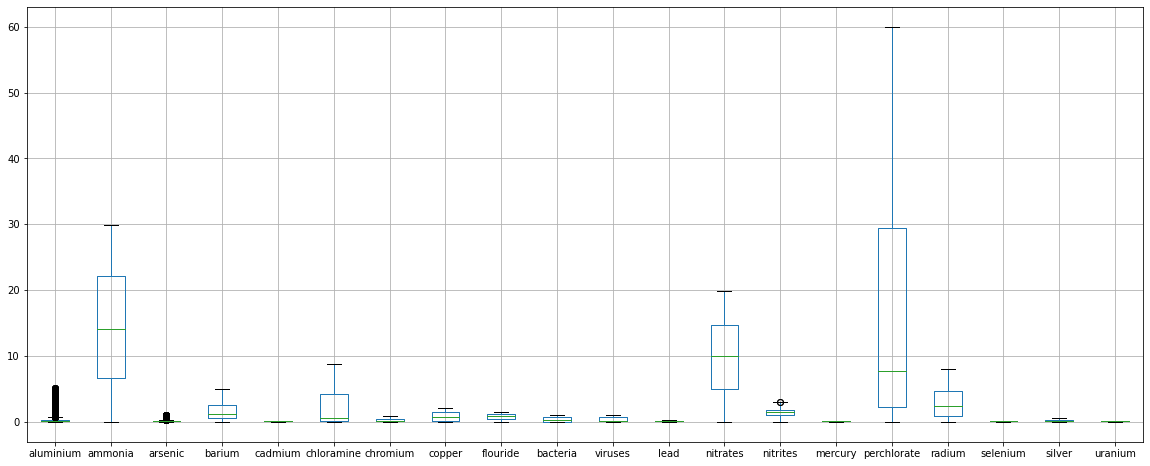

In [13]:
plt.figure(figsize=(20,8))
fv.boxplot()

In [14]:
cv.loc[cv['is_safe']=="#NUM!"]

,is_safe
7551,#NUM!
7568,#NUM!
7890,#NUM!


In [15]:
cv['is_safe']=cv['is_safe'].replace("#NUM!","0")

C:\Users\HP\AppData\Local\Temp\ipykernel_10860\827603623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv['is_safe']=cv['is_safe'].replace("#NUM!","0")


In [16]:
for i in cv['is_safe']:
    if len(i)>1:
        print(i)

<BarContainer object of 2 artists>

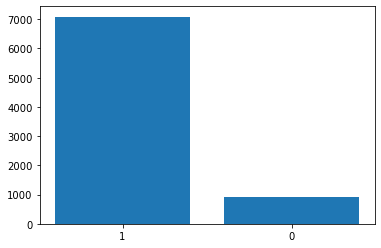

In [17]:
plt.bar(cv['is_safe'].unique(),cv.value_counts().values)

* this is a heavily imbalenced dataset

In [18]:
#data.loc[data['ammonia']=="#NUM!"]

<AxesSubplot:>

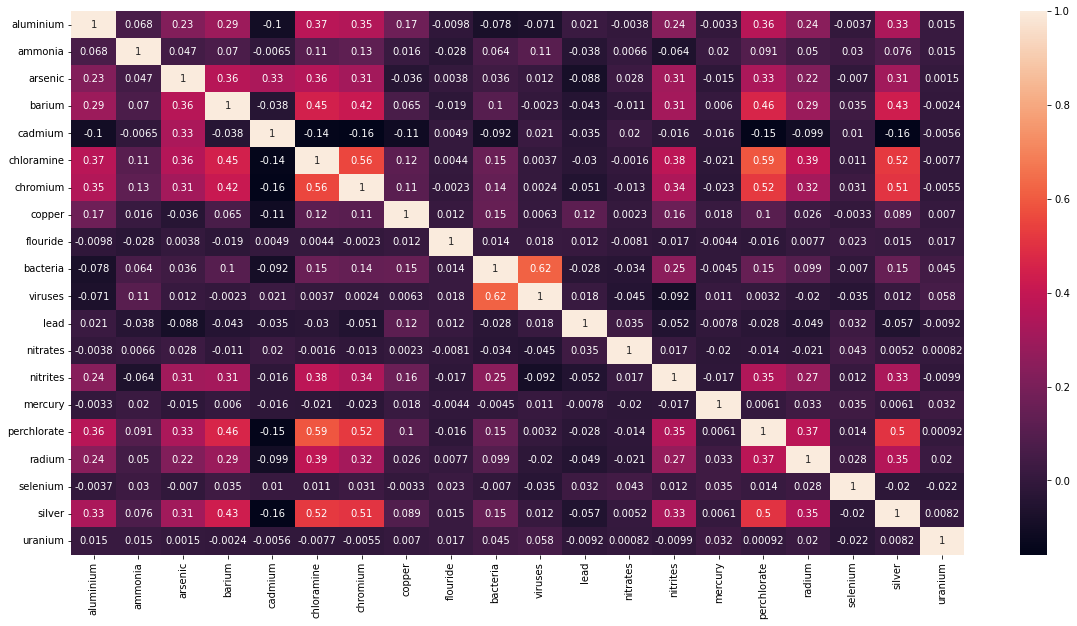

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(fv.corr(),annot=True)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,train_size=0.8,stratify=cv,random_state=1)

In [22]:
x_train = x_train.reset_index(drop=True)

In [23]:
x_train

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,0.86,24.50,0.46,2.75,0.100,5.27,0.07,1.45,0.11,0.19,0.004,0.133,13.61,1.92,0.005,24.19,0.18,0.00,0.36,0.08
1,0.11,15.14,0.03,1.76,0.007,6.63,0.62,1.57,0.26,0.69,0.690,0.182,1.49,1.81,0.008,24.91,2.39,0.01,0.20,0.05
2,0.03,20.35,0.01,1.47,0.003,3.09,0.52,1.68,1.40,0.16,0.005,0.164,10.88,1.54,0.005,19.88,4.21,0.09,0.17,0.06
3,3.00,3.92,0.04,1.05,0.001,1.64,0.04,0.02,0.47,0.28,0.005,0.141,6.15,1.78,0.007,41.93,3.50,0.01,0.47,0.09
4,0.18,14.03,0.67,4.23,0.010,0.88,0.48,0.18,0.74,0.19,0.005,0.112,18.59,1.70,0.008,39.78,4.51,0.06,0.05,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,3.17,19.21,0.22,0.51,0.010,7.90,0.43,1.84,0.75,0.00,0.920,0.142,7.71,1.39,0.004,13.54,5.84,0.02,0.38,0.09
6395,0.02,19.64,0.03,2.18,0.090,0.56,0.04,1.23,0.35,0.89,0.890,0.120,18.25,0.42,0.010,3.18,0.24,0.07,0.01,0.03
6396,0.06,15.37,0.07,0.63,0.020,0.02,0.03,0.03,1.10,0.00,1.000,0.165,8.02,0.76,0.003,5.33,1.59,0.09,0.01,0.00
6397,0.03,26.82,0.00,0.06,0.080,0.03,0.08,0.02,0.99,0.00,0.750,0.071,0.31,0.04,0.002,12.15,0.82,0.00,0.04,0.05


In [27]:
(y_train.value_counts()/len(y_train))

is_safe
0          0.88592
1          0.11408
dtype: float64

In [28]:
y_train = y_train.reset_index(drop=True)

In [30]:
y_train.head()

,is_safe
0,0
1,0
2,0
3,1
4,1


In [35]:
ros = RandomOverSampler()

In [36]:
x,y = ros.fit_resample(x_train,y_train)

In [38]:
x_train = pd.DataFrame(x)
y_train = pd.DataFrame(y)

In [40]:
y_train.value_counts()

is_safe
0          5669
1          5669
dtype: int64

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
model = knn.fit(x_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [46]:
x_test.reset_index(drop=True,inplace=True)

In [47]:
predicted = model.predict(x_test)

In [53]:
ac = accuracy_score(y_test,predicted)

In [50]:
gn = GaussianNB()
gm = gn.fit(x_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
pred = gm.predict(x_test)

In [52]:
accuracy_score(y_test,pred)

0.755

In [55]:
error = 1-ac